# Packages Loading


In [4]:
%load_ext autoreload
%autoreload 2

from pathlib import Path

import graphviz
import numpy as np
import pandas as pd
from matplotlib import cm as cmx
from matplotlib import colors as mpl_colors
from matplotlib import pyplot as plt

from metrics.june_dataset import JuNEDataset
from metrics.metrics_transtions import  TransitionMetrics


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Reading Data


In [5]:
path = Path("../data/all_experiments-25-08.csv")
df_hack = pd.read_csv(path, index_col=0).reset_index()
df_hack.head()


,index,time,session_id,kernel_id,notebook_name,event,cell_index,cell_num,cell_type,cell_source,cell_output,user_id,expert
0,0,2023-05-06 10:32:26.282,709ce80b-90a5-457e-bf6f-b7033a3261b5,bc147b33-fa74-4bff-9f48-c88809c5bdcd,task1.ipynb,save_notebook,NaN,NaN,NaN,"[\n {\n ""id"": ""35c0b3b694f84140846a21197ea...",NaN,student_7,False
1,1,2023-05-06 10:32:55.892,709ce80b-90a5-457e-bf6f-b7033a3261b5,bc147b33-fa74-4bff-9f48-c88809c5bdcd,task1.ipynb,execute,35c0b3b694f84140846a21197ea62f68,0.0,code,from mining_extension import check_logging \nc...,NaN,student_7,False
2,2,2023-05-06 10:32:56.229,709ce80b-90a5-457e-bf6f-b7033a3261b5,bc147b33-fa74-4bff-9f48-c88809c5bdcd,task1.ipynb,finished_execute,35c0b3b694f84140846a21197ea62f68,0.0,code,from mining_extension import check_logging \nc...,"[{""output_type"":""stream"",""size"":23}]",student_7,False
3,3,2023-05-06 10:32:58.048,709ce80b-90a5-457e-bf6f-b7033a3261b5,bc147b33-fa74-4bff-9f48-c88809c5bdcd,task1.ipynb,execute,35c0b3b694f84140846a21197ea62f68,0.0,code,from mining_extension import check_logging \nc...,NaN,student_7,False
4,4,2023-05-06 10:32:58.429,709ce80b-90a5-457e-bf6f-b7033a3261b5,bc147b33-fa74-4bff-9f48-c88809c5bdcd,task1.ipynb,finished_execute,35c0b3b694f84140846a21197ea62f68,0.0,code,from mining_extension import check_logging \nc...,"[{""output_type"":""stream"",""size"":23}]",student_7,False


In [6]:
june = JuNEDataset(df_hack)
june.to_dataframe().head()


,index,time,session_id,kernel_id,notebook_name,event,cell_index,cell_num,cell_type,cell_source,cell_output,user_id,expert
0,0,2023-05-06 10:32:26.282,709ce80b-90a5-457e-bf6f-b7033a3261b5,bc147b33-fa74-4bff-9f48-c88809c5bdcd,task1.ipynb,save_notebook,NaN,NaN,NaN,"[\n {\n ""id"": ""35c0b3b694f84140846a21197ea...",NaN,student_7,False
1,1,2023-05-06 10:32:55.892,709ce80b-90a5-457e-bf6f-b7033a3261b5,bc147b33-fa74-4bff-9f48-c88809c5bdcd,task1.ipynb,execute,35c0b3b694f84140846a21197ea62f68,0.0,code,from mining_extension import check_logging \nc...,NaN,student_7,False
2,2,2023-05-06 10:32:56.229,709ce80b-90a5-457e-bf6f-b7033a3261b5,bc147b33-fa74-4bff-9f48-c88809c5bdcd,task1.ipynb,finished_execute,35c0b3b694f84140846a21197ea62f68,0.0,code,from mining_extension import check_logging \nc...,"[{""output_type"":""stream"",""size"":23}]",student_7,False
3,3,2023-05-06 10:32:58.048,709ce80b-90a5-457e-bf6f-b7033a3261b5,bc147b33-fa74-4bff-9f48-c88809c5bdcd,task1.ipynb,execute,35c0b3b694f84140846a21197ea62f68,0.0,code,from mining_extension import check_logging \nc...,NaN,student_7,False
4,4,2023-05-06 10:32:58.429,709ce80b-90a5-457e-bf6f-b7033a3261b5,bc147b33-fa74-4bff-9f48-c88809c5bdcd,task1.ipynb,finished_execute,35c0b3b694f84140846a21197ea62f68,0.0,code,from mining_extension import check_logging \nc...,"[{""output_type"":""stream"",""size"":23}]",student_7,False


# Initializing of Metrics Processor


In [7]:
processor = TransitionMetrics()


In [ ]:
all_transitions = processor.calculate_metrics(june.df.iloc[:])
all_transitions.head()


 77%|███████▋  | 24/31 [03:35<03:25, 29.29s/it]

# Transitions Analysis


## Execution Transitions

In [ ]:
transitions = all_transitions.groupby('type').get_group('execution_transition')
transitions['change_num'] = transitions.cell_num_to - transitions.cell_num_from
transitions['transition_type'] = transitions.change_num.apply(
    lambda x: 'forward' if x > 0 else ("inner" if x == 0 else 'backward')
)


In [ ]:
merge_columns = ['user_id', 'kernel_id', 'expert', 'notebook_name']
transitions_merged = df_hack[merge_columns].drop_duplicates(keep='last').merge(transitions, on='kernel_id')

transitions_merged['task_type'] = transitions_merged.notebook_name.apply(
    lambda x: 1 if 'task1' in x else (2 if "task2" in x else 1)
)
transitions_merged.head()



## Transition of different types across different tasks

In [ ]:
task_transition_relations = transitions_merged.groupby(
    ["task_type", 'user_id'], as_index=False
) \
    .transition_type.value_counts(normalize=True) \
    .groupby(["task_type", 'transition_type'], as_index=False).proportion.mean()

task_transition_relations


In [ ]:
def get_average_transition_graphs(transitions_df: pd.DataFrame) -> dict[int, graphviz.Digraph]:
    jet = plt.get_cmap('plasma')
    cNorm = mpl_colors.Normalize(vmin=0, vmax=1)
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
    prev, cur, nx = 'Previous Cells', 'Current Cell', 'Next Cells'

    results: dict[int, graphviz.Digraph] = {}
    for name, g in transitions_df.groupby("task_type"):
        graph = graphviz.Digraph(filename="output/plain organogram 2.gv")
        matrix = g[['transition_type', 'proportion']].set_index('transition_type').proportion.to_dict()

        forward = matrix['forward']
        inner = matrix['inner']
        backward = matrix['backward']

        graph.edge(
            cur, prev,
            color=mpl_colors.to_hex(scalarMap.to_rgba(backward)), label=str(np.around(backward, 2))
        )
        graph.edge(
            cur, cur,
            color=mpl_colors.to_hex(scalarMap.to_rgba(inner)), label=str(np.around(inner, 2))
        )
        graph.edge(
            cur, nx,
            color=mpl_colors.to_hex(scalarMap.to_rgba(forward)), label=str(np.around(forward, 2))
        )
        results[name] = graph

    return results


### Task 1

In [ ]:
get_average_transition_graphs(task_transition_relations)[1]


### Task 2


In [ ]:
get_average_transition_graphs(task_transition_relations)[2]


# Transitions between events


In [ ]:
event_transitions_df = all_transitions.groupby('type').get_group('event_transition')
event_transitions_df

In [ ]:
merge_columns = ['user_id', 'kernel_id', 'expert', 'notebook_name']
event_transitions_merged = june.df[merge_columns].drop_duplicates(keep='last').merge(event_transitions_df,
                                                                                     on='kernel_id')

event_transitions_merged['task_type'] = event_transitions_merged.notebook_name.apply(
    lambda x: 1 if 'task1' in x else (2 if "task2" in x else 1)
)

SEP = "_"
event_transitions_merged[
    'transition_type'] = event_transitions_merged.event_from + SEP + event_transitions_merged.event_to

event_transitions_merged.head()



In [ ]:
task_event_transition_relations = event_transitions_merged.groupby(
    ["task_type", 'user_id'], as_index=False
) \
    .transition_type.value_counts(normalize=True) \
    .groupby(["task_type", 'transition_type'], as_index=False).proportion.mean()

task_event_transition_relations


In [ ]:
# labels = list(task_event_transition_relations.event_from.unique())
labels = ['create', 'execute', 'delete',
          'kernel_interrupting', 'kernel_restarting']
labels_idx_mapping = {v: k for k, v in enumerate(labels)}
labels_idx_mapping


In [ ]:
data = []
tm = task_event_transition_relations[['transition_type', 'proportion']].set_index('transition_type').to_dict()[
    'proportion']
for l1 in labels:
    for l2 in labels:
        if f"{l1}_{l2}" in tm:
            data.append((labels_idx_mapping[l1], labels_idx_mapping[l2], tm[f"{l1}_{l2}"]))

source, target, value = np.array(data).T

In [ ]:
idx_color_mapping = {
    0: '#F5B19C',
    1: "#5C9090",
    2: "#E9B666",
    3: "#BFD0CA",
    4: "#A5B2B5",
}
colors = [idx_color_mapping[i] for i in source]


In [ ]:
import plotly.graph_objects as go

np.random.seed(42)
fig = go.Figure(go.Sankey(
    arrangement="snap",
    node={"label": labels, 'pad': 50, "color": list(idx_color_mapping.values())},
    link={
        "source": source, "target": target, "value": value,
        "color": colors}
))

# plotly.io.write_image(fig, 'figures/sankey_transitions.pdf', format='pdf')
# plotly.plotly.image.save_as(fig, 'my_plot.png')
# fig.write_image("figures/sankey_transitions.png")


fig.show()


# Students and Experts

In [11]:
task_transition_relations = transitions_merged.groupby(
    ["task_type", 'user_id', 'expert'], as_index=False
) \
    .transition_type.value_counts(normalize=True) \
    .groupby(["task_type", 'transition_type', 'expert'], as_index=False).proportion.mean()

task_transition_relations


,task_type,transition_type,expert,proportion
0,1,backward,False,0.107196
1,1,backward,True,0.146745
2,1,forward,False,0.362607
3,1,forward,True,0.311267
4,1,inner,False,0.530197
5,1,inner,True,0.541988
6,2,backward,False,0.134181
7,2,backward,True,0.148000
8,2,forward,False,0.406874
9,2,forward,True,0.476759


# Task 1

## Expert

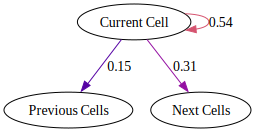

In [12]:
get_average_transition_graphs(
    task_transition_relations.groupby('expert').get_group(True)
)[1]


## Student

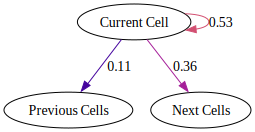

In [13]:
get_average_transition_graphs(
    task_transition_relations.groupby('expert').get_group(False)
)[1]

# Task 2

## Expert

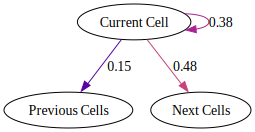

In [14]:
get_average_transition_graphs(
    task_transition_relations.groupby('expert').get_group(True)
)[2]


## Student

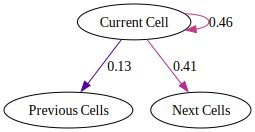

In [15]:
get_average_transition_graphs(
    task_transition_relations.groupby('expert').get_group(False)
)[2]


In [21]:
task_transition_relations.groupby(["task_type", 'expert']).transition_type()

TypeError: 'SeriesGroupBy' object is not callable

In [35]:
df_full = task_transition_relations.set_index(['task_type', 'expert'])
df_full
# df_full['proportion'] = (df_full[['proportion']].round(2) * 100).applymap('{:.0f}%'.format)
# print(df_full.to_latex(escape=True, multirow=True))
# # df_full.round(2).applymap('{:.2f}'.format).to_latex(escape=True, multirow=True)

transition_type  proportion
task_type expert                            
1         False         backward    0.107196
          True          backward    0.146745
          False          forward    0.362607
          True           forward    0.311267
          False            inner    0.530197
          True             inner    0.541988
2         False         backward    0.134181
          True          backward    0.148000
          False          forward    0.406874
          True           forward    0.476759
          False            inner    0.458945
          True             inner    0.375241